In [20]:
print("Mya is a lozer")

Mya is a lozer


In [63]:
import pandas as pd
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
files = ['phosphorus_spring_overturn_lake.xlsx', 'chlorophyll_lake.xlsx', 'dissolved_oxygen_temp_lake.xlsx', 'phosphorus_spring_and_summer_lake.xlsx']

for file in files:
        url = f"https://github.com/haleyej/clean_water_corps_data/raw/main/{file}"
        urllib.request.urlretrieve(url, file)

In [3]:
phos_df = pd.read_excel(files[0], engine='openpyxl')
chloro_df = pd.read_excel(files[1], engine='openpyxl')
oxy_df = pd.read_excel(files[2], engine='openpyxl')
phos2_df = pd.read_excel(files[3], engine='openpyxl')

In [39]:
phos_df['Year'] = phos_df['Date Sampled'].str[:4]
chloro_df['Year'] = chloro_df['Date Sampled'].str[:4]
oxy_df['Year'] = oxy_df['Date Sampled'].str[:4]
phos2_df['Year'] = phos2_df['Date Sampled'].str[:4]

In [40]:
new_phos_df = phos_df[['Lake Name', 'Phosphorus (ug P/L)', 'Year']]
new_chloro_df = chloro_df[['Lake Name', 'Secchi Depth (ft)', 'Chlorophyll (ug P/L)', 'Year']]
new_oxy_df = oxy_df[['Lake Name', 'Depth (feet)', 'Temp (°C)', 'DO Level (mg/L)', 'Year']]

In [41]:
def num(s):
    try:
        return pd.to_numeric(s)
    except:
        return None
    
new_phos_df['Phosphorus'] = new_phos_df['Phosphorus (ug P/L)'].apply(lambda s: num(s))
new_chloro_df['Chlorophyll'] = new_chloro_df['Chlorophyll (ug P/L)'].apply(lambda s: num(s))

C:\Users\myaon\AppData\Local\Temp\ipykernel_22684\803825309.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_phos_df['Phosphorus'] = new_phos_df['Phosphorus (ug P/L)'].apply(lambda s: num(s))
C:\Users\myaon\AppData\Local\Temp\ipykernel_22684\803825309.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_chloro_df['Chlorophyll'] = new_chloro_df['Chlorophyll (ug P/L)'].apply(lambda s: num(s))


In [42]:
phosphorus = new_phos_df.groupby(['Lake Name', 'Year'])['Phosphorus'].mean().reset_index()
secchi = new_chloro_df.groupby(['Lake Name', 'Year'])['Secchi Depth (ft)'].mean().reset_index()
chlorophyll = new_chloro_df.groupby(['Lake Name', 'Year'])['Chlorophyll'].mean().reset_index()
depth = new_oxy_df.groupby(['Lake Name', 'Year'])['Depth (feet)'].mean().reset_index()
temp = new_oxy_df.groupby(['Lake Name', 'Year'])['Temp (°C)'].mean().reset_index()
oxygen = new_oxy_df.groupby(['Lake Name', 'Year'])['DO Level (mg/L)'].mean().reset_index()

In [43]:
phosphorus.head()

,Lake Name,Year,Phosphorus
0,1000 Island,2017,11.0
1,1000 Island,2018,13.0
2,1000 Island,2019,17.0
3,1000 Island,2021,16.0
4,Ada Impoundment (Thornapple River),2002,57.0


In [57]:
values = phosphorus.merge(secchi, how='inner', on=['Lake Name', 'Year'])
values = values.merge(chlorophyll, how='inner', on=['Lake Name', 'Year'])
values = values.merge(depth, how='inner', on=['Lake Name', 'Year'])
values = values.merge(temp, how='inner', on=['Lake Name', 'Year'])
values = values.merge(oxygen, how='inner', on=['Lake Name', 'Year'])

In [58]:
values = values.drop('Lake Name', axis=1)
values['Year'] = values['Year'].apply(lambda y: num(y))
values = values.sort_values('Year')

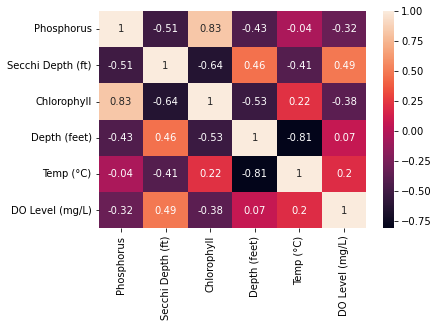

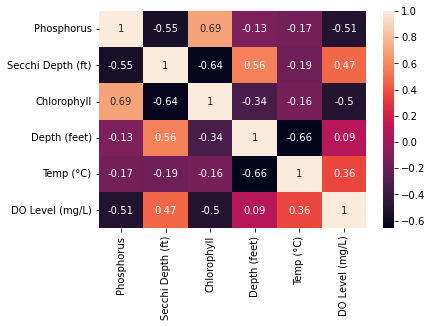

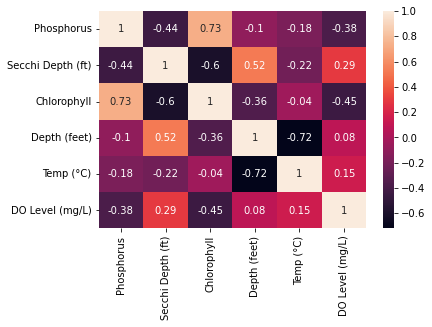

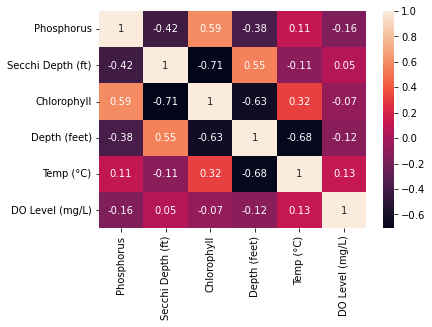

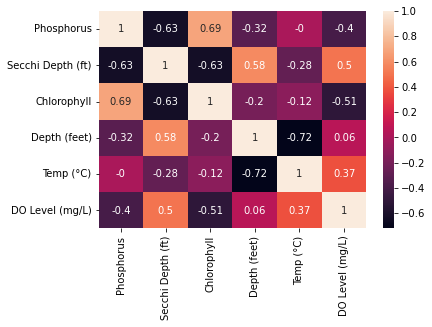

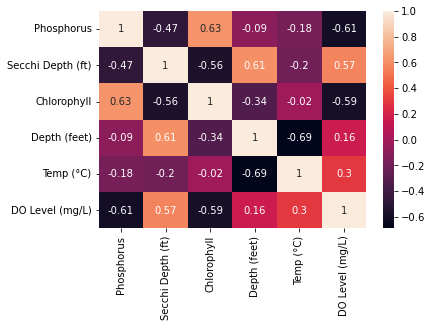

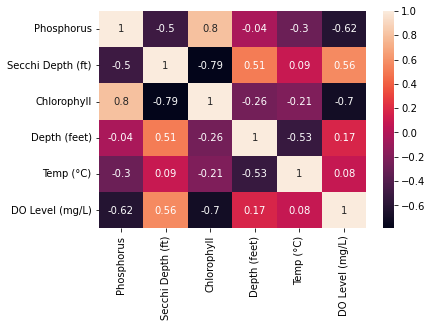

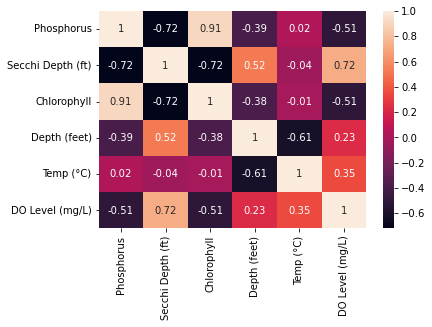

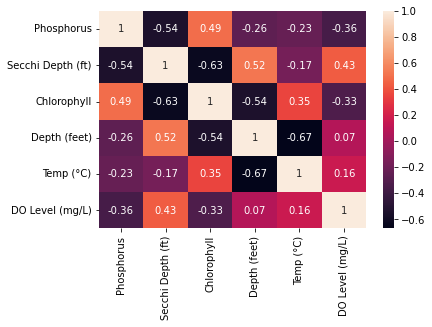

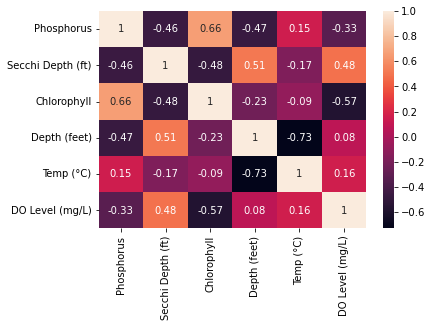

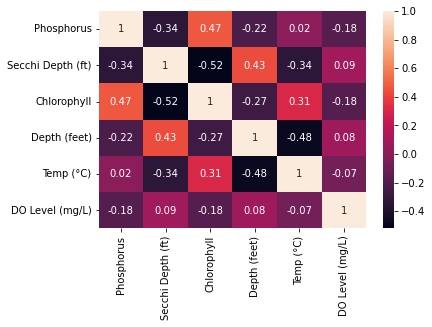

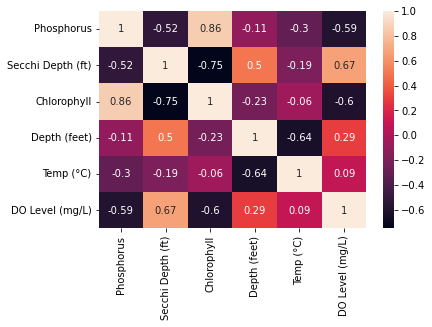

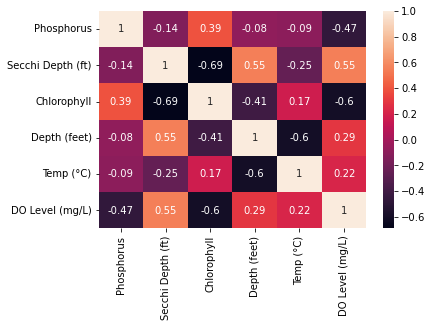

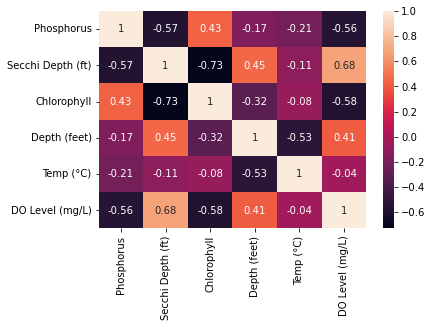

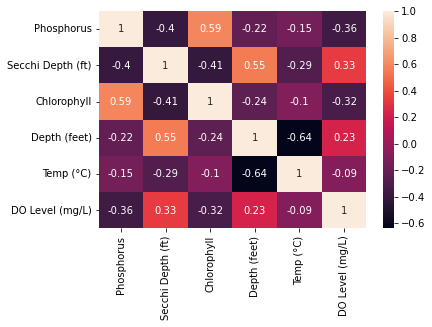

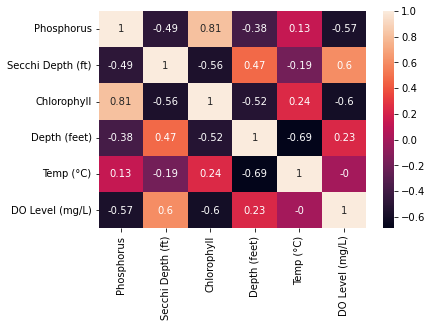

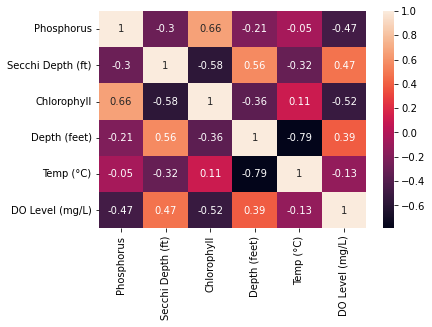

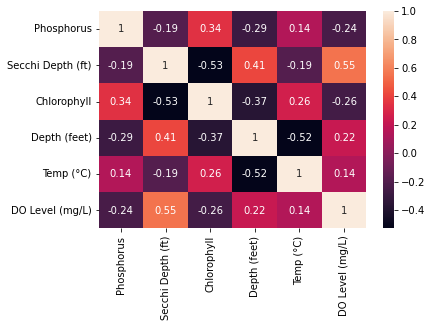

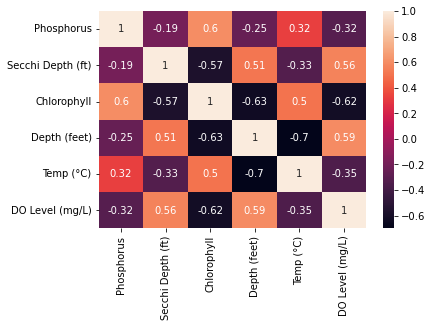

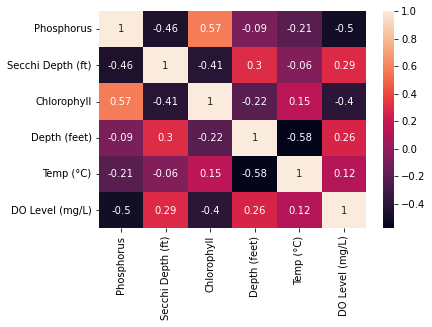

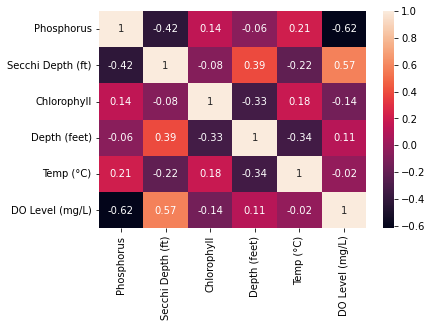

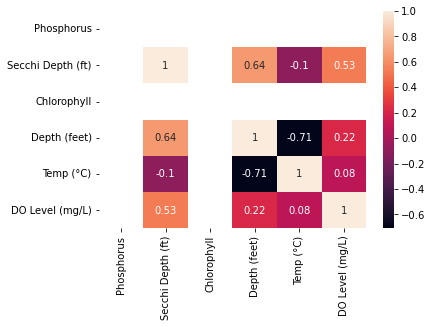

In [64]:
years = values['Year'].unique()

for year in years:
    yearly_values = values[values['Year'] == year]
    yearly_values = yearly_values.drop('Year', axis=1)
    correlations = yearly_values.corr().round(2)
    sns.heatmap(correlations, annot=True)
    plt.show()
